In [1]:
import pandas as pd
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from nltk import word_tokenize
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

In [2]:
df = pd.read_csv('csv/cleaned_csv/iPhoneTweetsInitial_cleaned.csv').drop(['Unnamed: 0'],axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13737 entries, 0 to 13736
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           13737 non-null  object
 1   tweet        13737 non-null  object
 2   clean_tweet  13554 non-null  object
dtypes: object(3)
memory usage: 322.1+ KB


In [4]:
df.isna().sum()

id               0
tweet            0
clean_tweet    183
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13737 entries, 0 to 13736
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           13737 non-null  object
 1   tweet        13737 non-null  object
 2   clean_tweet  13554 non-null  object
dtypes: object(3)
memory usage: 322.1+ KB


In [6]:
analyzer = SentimentIntensityAnalyzer()

scores = []
for sentence in df['tweet']:
  score = analyzer.polarity_scores(sentence)
  scores.append(score)
  
scores = pd.DataFrame(scores)

df['Compound'] = scores['compound']
df['Negative'] = scores['neg']
df['Neutral'] = scores['neu']
df['Positive'] = scores['pos']
df.head()

,id,tweet,clean_tweet,Compound,Negative,Neutral,Positive
0,1438205036262268939,iPhone 13😑😑I expected more,expect,0.0000,0.000,1.000,0.000
1,1438204990389211139,@abbietayo You too pretty to be stressed. How ...,abbietayo pretty stress much btw,0.2714,0.142,0.651,0.207
2,1438204983892013056,iPhone 13 versus iPhone 12 performance compari...,versus performance comparison miss keynote,-0.2960,0.180,0.820,0.000
3,1438204964669513728,@macworld iPhone 13 NEEDED Touch ID!,macworld need touch id,0.0000,0.000,1.000,0.000
4,1438204931094106113,Apple launched the new iPhone 13 mini on 14th ...,launch new mini th september california even...,0.1280,0.000,0.939,0.061


In [7]:
sentiment = []

for i in range(len(df)):
  if (df['Compound'][i] < 0):
    sentiment.append("Negative")
  elif (df['Compound'][i] > 0):
    sentiment.append("Positive")
  else:
    sentiment.append("Neutral")
    
sentiment = pd.DataFrame(sentiment)
df['Sentiment'] = sentiment
df.head()

,id,tweet,clean_tweet,Compound,Negative,Neutral,Positive,Sentiment
0,1438205036262268939,iPhone 13😑😑I expected more,expect,0.0000,0.000,1.000,0.000,Neutral
1,1438204990389211139,@abbietayo You too pretty to be stressed. How ...,abbietayo pretty stress much btw,0.2714,0.142,0.651,0.207,Positive
2,1438204983892013056,iPhone 13 versus iPhone 12 performance compari...,versus performance comparison miss keynote,-0.2960,0.180,0.820,0.000,Negative
3,1438204964669513728,@macworld iPhone 13 NEEDED Touch ID!,macworld need touch id,0.0000,0.000,1.000,0.000,Neutral
4,1438204931094106113,Apple launched the new iPhone 13 mini on 14th ...,launch new mini th september california even...,0.1280,0.000,0.939,0.061,Positive


In [8]:
df.dropna(inplace=True)
df.isna().sum()

id             0
tweet          0
clean_tweet    0
Compound       0
Negative       0
Neutral        0
Positive       0
Sentiment      0
dtype: int64

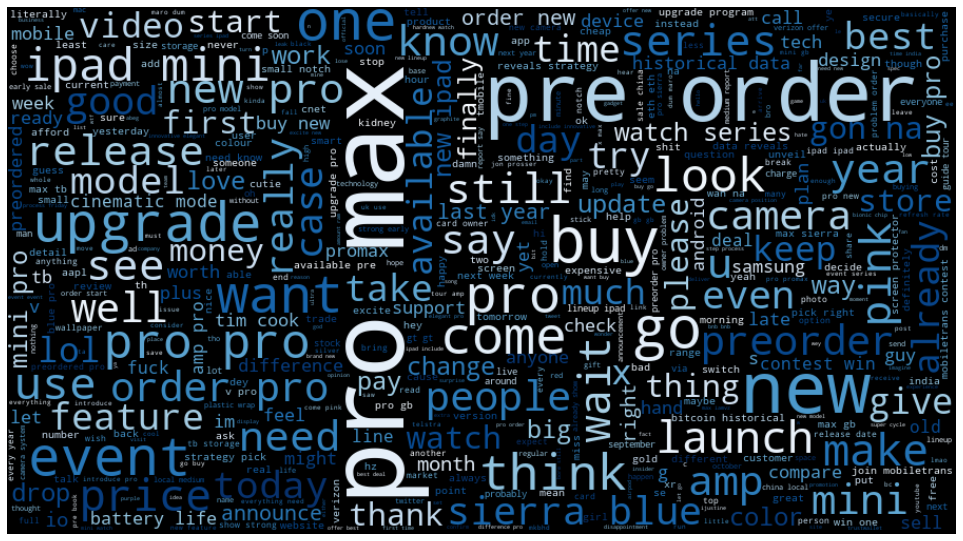

In [9]:
# WordCloud
all_words = ' '.join([text for text in df['clean_tweet']])

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
negative_df = df[df['Sentiment'] == 'Negative']

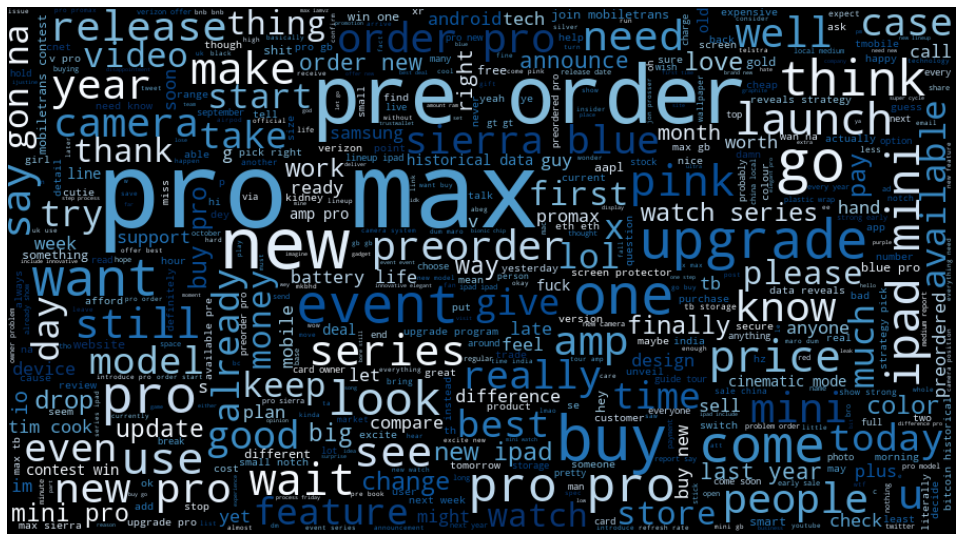

In [16]:
negative_words = ' '.join([text for text in negative_df['clean_tweet']])

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
positive_df = df[df['Sentiment'] == 'Positive']

In [14]:
positive_df.head()

,id,tweet,clean_tweet,Compound,Negative,Neutral,Positive,Sentiment
1,1438204990389211139,@abbietayo You too pretty to be stressed. How ...,abbietayo pretty stress much btw,0.2714,0.142,0.651,0.207,Positive
4,1438204931094106113,Apple launched the new iPhone 13 mini on 14th ...,launch new mini th september california even...,0.1280,0.000,0.939,0.061,Positive
5,1438204912987373573,Anyone know how to find the latest iPhone/iPad...,anyone know find late ipad device identifier ...,0.7579,0.000,0.854,0.146,Positive
8,1438204853008883712,Welp if the pink iPhone 13 doesn’t come in max...,welp pink come max keep like small,0.4199,0.000,0.866,0.134,Positive
12,1438204777150693376,@macnrg I have an iphone 15 why would I want a...,macnrg would want,0.0772,0.000,0.860,0.140,Positive


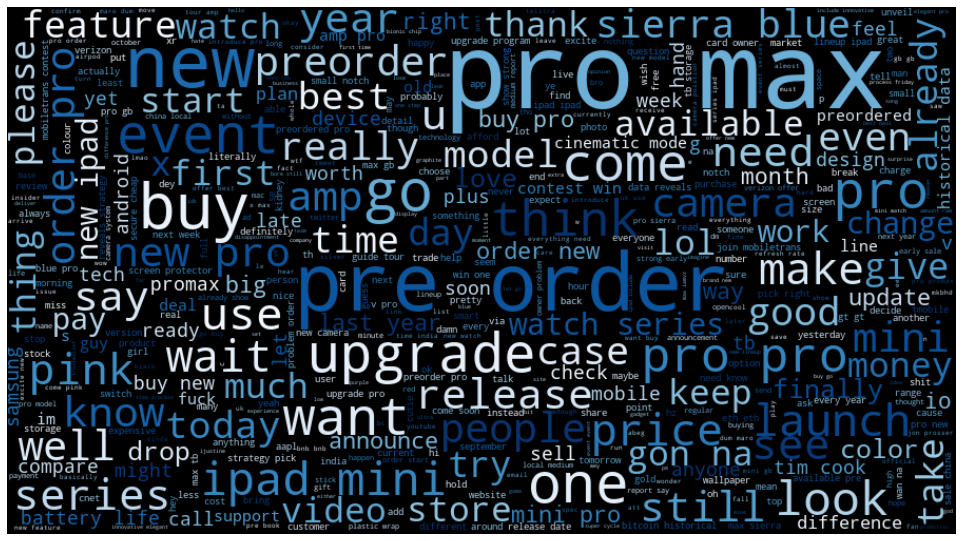

In [13]:
positive_words = ' '.join([text for text in positive_df['clean_tweet']])

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()